# Exercise 4

Authors:
- Tuoxing Liu
- Sima Esmaeili
- Shruti Ghargi

## 1. Constructing the matrix X

alphas.shape=(179,)
y.shape=(49225,)
Np=15
n.shape=(2,),C.shape=(2, 100),p.shape=(100,)
p, [ 0.64476056  1.38790538  2.13105021  2.87419503  3.61733986  4.36048468
  5.10362951  5.84677434  6.58991916  7.33306399  1.31389116  2.05703599
  2.80018081  3.54332564  4.28647047  5.02961529  5.77276012  6.51590494
  7.25904977  8.00219459  1.98302177  2.72616659  3.46931142  4.21245625
  4.95560107  5.6987459   6.44189072  7.18503555  7.92818037  8.6713252
  2.65215238  3.3952972   4.13844203  4.88158685  5.62473168  6.3678765
  7.11102133  7.85416615  8.59731098  9.34045581  3.32128298  4.06442781
  4.80757263  5.55071746  6.29386228  7.03700711  7.78015194  8.52329676
  9.26644159 10.00958641  3.99041359  4.73355841  5.47670324  6.21984806
  6.96299289  7.70613772  8.44928254  9.19242737  9.93557219 10.67871702
  4.65954419  5.40268902  6.14583385  6.88897867  7.6321235   8.37526832
  9.11841315  9.86155797 10.6047028  11.34784762  5.3286748   6.07181963
  6.81496445  7.55810928  8.3012541

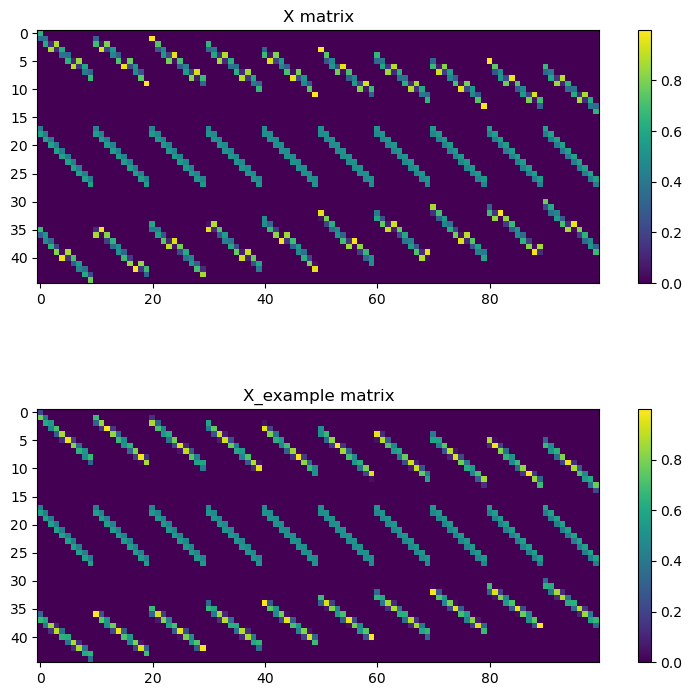

In [48]:
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import scipy


def construct_X(M, alphas, Np=None):
    if Np is None:
        Np = int(np.ceil(np.sqrt(2) * M))
    if Np % 2 == 0:
        Np = Np + 1  # get an odd number for Np
    print(f"Np={Np}")

    D = M * M
    No = len(alphas)
    N = Np * No

    h = 1
    a0 = - (M - 1) / 2
    b0 = - (M - 1) / 2
    s0 = (Np - 1) / 2
    ja = np.mgrid[0:D] % M
    jb = np.mgrid[0:D] // M
    C = np.stack((a0 + ja * h, b0 + jb * h))
    # print(f"C.shape={C.shape}")

    i_indices = []
    j_indices = []
    weights = []

    for alpha_idx in range(len(alphas)):
        alpha = alphas[alpha_idx] # I don't know why, but alpha in my code is inversed
        n = np.array([np.cos(np.deg2rad(alpha)), np.sin(np.deg2rad(alpha))])
        p = np.dot(n.T, C) + s0
        print(f"n.shape={n.shape},C.shape={C.shape},p.shape={p.shape}")
        print("p,", p)

        # print(f"len(ja)={len(ja)},len(jb)={len(jb)}")
        # print(f"(p%1).shape={(p%1).shape}")
        j_indices.extend(ja + M * jb)
        i_indices.extend((p // 1) + alpha_idx * Np)
        weights.extend(p % 1)

        # j_indices.extend(ja + M * jb)
        # i_indices.extend((p+1 // 1) + alpha_idx * Np)
        # weights.extend(1-(p % 1))

    X = coo_matrix((weights, (i_indices, j_indices)),
                   shape=(N, D), dtype=np.float32)
    return X


data_path = "./hs_tomography/"

y = np.load(os.path.join(data_path, "y_195.npy"))
alphas = np.load(os.path.join(data_path, "alphas_195.npy"))

# Example usage
print(f"alphas.shape={alphas.shape}")
print(f"y.shape={y.shape}")
alphas = [42, 1, -33]
X = construct_X(10, alphas)
# print("X", X)
# Convert sparse matrix to dense numpy array for visualization
X_dense = X.toarray()
# print(X_dense.shape)
# print(X_dense)

# Visualize the matrix with the adjusted color scale
fig, axs = plt.subplots(2,1, figsize=(10,8))
im0 = axs[0].imshow(X_dense, cmap='viridis')
axs[0].set_title('X matrix')
fig.colorbar(im0, ax=axs[0])

X_example = np.load('hs_tomography/X_example.npy', allow_pickle=True)

im1 = axs[1].imshow(X_example, cmap='viridis')
axs[1].set_title('X_example matrix')
fig.colorbar(im1, ax=axs[1])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5,top = 0.9)

plt.show()

In [35]:
print("X", X.toarray())
print("X_example", X_example)

X [[0.64476055 0.         0.         ... 0.         0.         0.        ]
 [0.         0.3879054  0.         ... 0.         0.         0.        ]
 [0.         0.         0.13105021 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
X_example [[0.22489321 0.         0.         ... 0.         0.         0.        ]
 [0.7751068  0.38622263 0.         ... 0.         0.         0.        ]
 [0.         0.61377734 0.54755205 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
y_195 = np.load(os.path.join(data_path, "y_195.npy"))
alphas_195 = np.load(os.path.join(data_path, "alphas_195.npy"))
M_195 = 195
X_195 = construct_X(M_195, alphas_195,275)
X_195 = scipy.sparse.csc_matrix(X_195)

print(f"X.shape={X_195.shape}, y.shape={y_195.shape}")

beta_195 = scipy.sparse.linalg.lsqr(X_195,y_195, atol =1e-05, btol = 1e-05)[0]
print(beta_195)

plt.imshow(beta_195.reshape(-1,M_195), cmap='viridis')
plt.colorbar()
plt.title('tomogram')
plt.show()

Np=275
X.shape=(49225, 38025), y.shape=(49225,)


KeyboardInterrupt: 

In [ ]:
y_195 = np.load(os.path.join(data_path, "y_195.npy"))
alphas_195 = np.load(os.path.join(data_path, "alphas_195.npy"))
M_195 = 195
X_195 = construct_X(M_195, alphas_195,275)
X_195 = scipy.sparse.csc_matrix(X_195)

print(f"X.shape={X_195.shape}, y.shape={y_195.shape}")

beta_195 = scipy.sparse.linalg.lsqr(X_195,y_195, atol =1e-05, btol = 1e-05)[0]
print(beta_195)

plt.imshow(beta_195.reshape(-1,M_195), cmap='viridis')
plt.colorbar()
plt.title('tomogram')
plt.show()

Np=275
X.shape=(49225, 38025), y.shape=(49225,)


KeyboardInterrupt: 

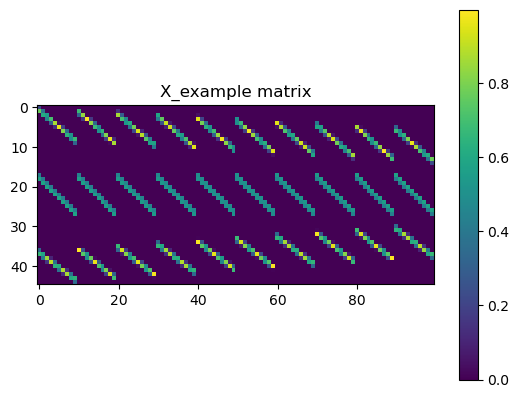

## 2. Recovering the image

Np=109
X.shape=(9810, 5929), y.shape=(9810,)
[ 29.76195346 -17.72767876 109.12552971 ... -58.87232431 -20.23153671
 -75.52328147]


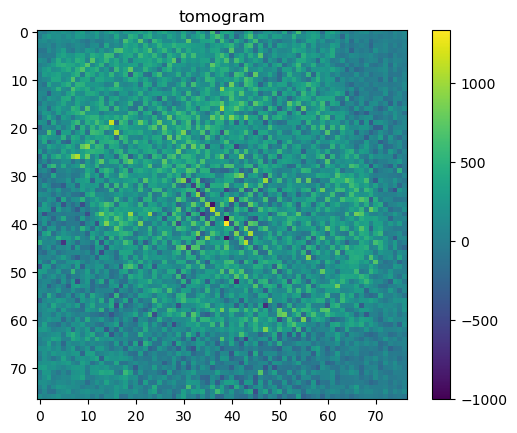

In [5]:
y_77 = np.load("hs_tomography/y_77.npy")
alphas_77 = np.load("hs_tomography/alphas_77.npy")
M_77 = 77
X_77 = construct_X(M_77, alphas_77,109)
X_77 = scipy.sparse.csc_matrix(X_77)

print(f"X.shape={X_77.shape}, y.shape={y_77.shape}")

beta_77 = scipy.sparse.linalg.lsqr(X_77,y_77, atol =1e-05, btol = 1e-05)[0]
print(beta_77)

plt.imshow(beta_77.reshape(-1,M_77), cmap='viridis')
plt.colorbar()
plt.title('tomogram')
plt.show()

In [6]:
y_195 = np.load(os.path.join(data_path, "y_195.npy"))
alphas_195 = np.load(os.path.join(data_path, "alphas_195.npy"))
M_195 = 195
X_195 = construct_X(M_195, alphas_195,275)
X_195 = scipy.sparse.csc_matrix(X_195)

print(f"X.shape={X_195.shape}, y.shape={y_195.shape}")

beta_195 = scipy.sparse.linalg.lsqr(X_195,y_195, atol =1e-05, btol = 1e-05)[0]
print(beta_195)

plt.imshow(beta_195.reshape(-1,M_195), cmap='viridis')
plt.colorbar()
plt.title('tomogram')
plt.show()

Np=275
X.shape=(49225, 38025), y.shape=(49225,)


KeyboardInterrupt: 

X.shape=(9810, 5929), y.shape=(9810,)
[3.0405151  5.88983136 3.89529036 ... 0.27282954 1.34370238 1.4204975 ]


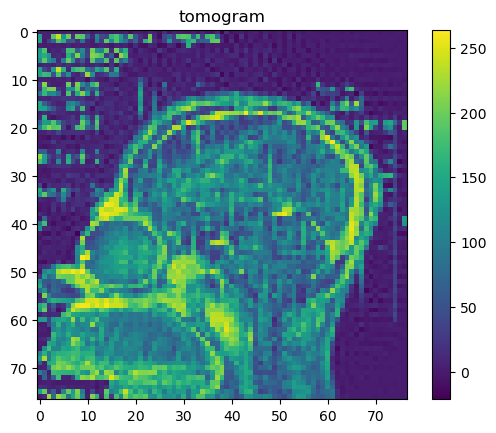

In [ ]:

# import data
X_77 = np.load('hs_tomography/X_77.npy', allow_pickle=True)
X_77 = scipy.sparse.csc_matrix(X_77.all())
y_77 = np.load("hs_tomography/y_77.npy")
M_77 = 77

print(f"X.shape={X_77.shape}, y.shape={y_77.shape}")
beta = scipy.sparse.linalg.lsqr(X_77,y_77, atol =1e-05, btol = 1e-05)[0]
print(beta)

plt.imshow(beta.reshape(-1,M_77), cmap='viridis')
plt.colorbar()
plt.title('tomogram')
plt.show()